#Пункт 1 

Загрузим файл HR.csv в pandas dataframe

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
HR = pd.read_csv('/content/drive/MyDrive/HR.csv') # загрузим входные данные
HR.info() # проверим наличии пропусков данных
# пропуски отсутвуют 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
HR['promotion_last_5years'].value_counts()[1]

319

#Пункт 2

Рассчитаем основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).


In [ ]:
# Для наглядности отразим меры центральной тенденции в одной сроке для каждого показателя
print('Среднеарифметический уровень удовлетворенности работой составляет:', HR['satisfaction_level'].mean().round(2), 'медианный:', HR['satisfaction_level'].median(), 'модальный:', HR['satisfaction_level'].mode()[0])
print('Среднее время прошедшее с даты оценки в годах:', HR['last_evaluation'].mean().round(2), 'медианное:', HR['last_evaluation'].median(), 'модальное:', HR['last_evaluation'].mode()[0])
print('Среднее количество выполненых проектов сотрудниками:', int(HR['number_project'].mean()), 'медианное:', int(HR['number_project'].median()), 'модальное', HR['number_project'].mode()[0])
print('Среднемесячное время проведенное сотрудником на работе', HR['average_montly_hours'].mean().round(2), 'медианное:', HR['average_montly_hours'].median(), 'модальное:', HR['average_montly_hours'].mode()[0])
print('Средний стаж работы в компании:', HR['time_spend_company'].mean().round(2), 'медианный', HR['time_spend_company'].median(), 'модальный', HR['time_spend_company'].mode()[0])
print('Среднее количество несчастных случаев', HR['Work_accident'].mean().round(2), 'Модальное значение в категории несчастные случаи:', HR['Work_accident'].mode()[0])
print('Среднее количество увольнений:', HR['left'].mean().round(2),'Модальное значение в категории увольнение:', HR['left'].mode()[0])
print('Среднее количество повышений:', HR['promotion_last_5years'].mean().round(2),'Модальное значение в категории повышение:', HR['promotion_last_5years'].mode()[0])
print('Модальное значение в категории отдел:', HR['department'].mode()[0])
print('Модальное значение в категории зарплата:', HR['salary'].mode()[0])

Среднеарифметический уровень удовлетворенности работой составляет: 0.61 медианный: 0.64 модальный: 0.1
Среднее время прошедшее с даты оценки в годах: 0.72 медианное: 0.72 модальное: 0.55
Среднее количество выполненых проектов сотрудниками: 3 медианное: 4 модальное 4
Среднемесячное время проведенное сотрудником на работе 201.05 медианное: 200.0 модальное: 135
Средний стаж работы в компании: 3.5 медианный 3.0 модальный 3
Среднее количество несчастных случаев 0.14 Модальное значение в категории несчастные случаи: 0
Среднее количество увольнений: 0.24 Модальное значение в категории увольнение: 0
Среднее количество повышений: 0.02 Модальное значение в категории повышение: 0
Модальное значение в категории отдел: sales
Модальное значение в категории зарплата: low


In [ ]:
# Расчет максимальных и минимальных показателей и среднеквадратического отклонения
print('Минимальный уровень удовлетворенности работой:', HR['satisfaction_level'].min(),'Максимальный:', HR['satisfaction_level'].max(),'Среднеквадратическое отклонение:', HR['satisfaction_level'].std().round(2))
print('Минимальное время прошедшее с даты оценки:', HR['satisfaction_level'].min(),'Максимальное:', HR['satisfaction_level'].max(),'Среднеквадратическое отклонение:', HR['satisfaction_level'].std().round(2))
print('Минимальное количество выполненых сотрудником проектов:', HR['number_project'].min(), 'Максимальное:', HR['number_project'].max(), 'Среднеквадратическое отклонение:', HR['number_project'].std().round(2))
print('Минимальное отработаное время:', HR['average_montly_hours'].min(), 'Максимальное:', HR['average_montly_hours'].max(), 'Среднеквадратическое отклонение:', HR['average_montly_hours'].std().round(2))
print('Минимальный стаж:', HR['time_spend_company'].min(), 'Максимальный:', HR['time_spend_company'].max(), 'Среднеквадратическое отклонение:', HR['time_spend_company'].std().round(2))

Минимальный уровень удовлетворенности работой: 0.09 Максимальный: 1.0 Среднеквадратическое отклонение: 0.25
Минимальное время прошедшее с даты оценки: 0.09 Максимальное: 1.0 Среднеквадратическое отклонение: 0.25
Минимальное количество выполненых сотрудником проектов: 2 Максимальное: 7 Среднеквадратическое отклонение: 1.23
Минимальное отработаное время: 96 Максимальное: 310 Среднеквадратическое отклонение: 49.94
Минимальный стаж: 2 Максимальный: 10 Среднеквадратическое отклонение: 1.46


#Пункт 3

Рассчитаем и визуализируем корреляционную матрицу для
количественных переменных.
Определим две самые скоррелированные и две наименее
скоррелированные переменные

Для начала определим какие из переменных являются количественными а какие качественными

satisfaction_level, - является количественной (непрерывной) переменной указывает на замер удовлетворенности работой у человека в определенных еденицах

last_evaluation - также количественная (непрерывная) переменная указывает на количество лет прошедших с последнего замера

number_project, average_montly_hours, time_spend_company - Количественные (дискретные) переменные

Work_accident, left, promotion_last_5years - хоть и выражены в числах являются качественными двоичными переменными и условно означают "пострадавший/непострадавший", "уволен/неуволен", "повышен/неповышен"

department -  качественная номинальная переменная

salary - качественная порядковая переменными

Таким образом количественными являются всего пять: 'satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company'

<Axes: ylabel='Frequency'>

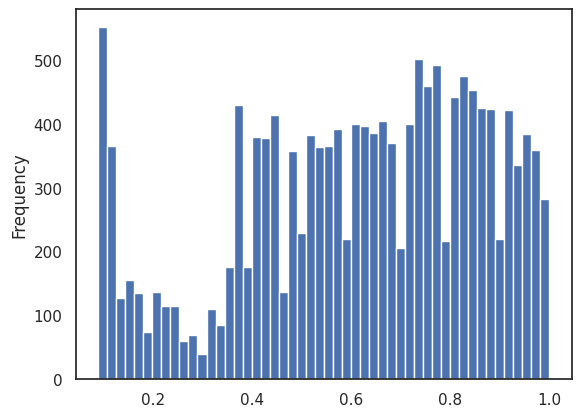

In [ ]:
# Теперь нам необходимо понять является ли распределение внутри количественных переменных нормальным или нет, на основании этих данных мы примем решение 
# о применении коэффициента Пирсона или коэффициэнта Спирмена при проведении корреляционного анализа
HR['satisfaction_level'].plot(kind = 'hist', bins = 50)
# как видно из визуализации распределение значений в категории удовлетворенность работой не является нормальным

In [ ]:
# Перепроверим себя, и проверим гипотезу что наше распределение не является нормальными с помощью теста Колмогорова-Смирнова
from scipy.stats import kstest
stat, pvalue = kstest(HR['satisfaction_level'], 'norm')
alpha = 0.05
print('p-value', pvalue)
if pvalue > alpha:
    print('H0 = данные получены из нормального распределения')
else:
    print('H1 = данные получены не из нормального распределения')

p-value 0.0
H1 = данные получены не из нормального распределения


Распределение не является нормальным и соответственно применять при расчете корреляции коэффициент Пирсона нельзя, будем использовать коэффициент Спирмена

In [ ]:
# кроме того использование рангового коэффициента Спирмена позволит нам добавить к нашему корреляционному анализу еще одну качественную переменную
# у исполнителя есть предположение что уровень заработной платы скоррелирован с удовлетвотренностью сотрудников
# для этого мы можем добавить графу salary_2 которую заполним следующими значениями, если в графе salary имеется запись 'low' в графе salary_2 мы укажем 1,
# и соответсвенно если 'medium' укажем 2, 'high' укажем 3
HR.loc[HR['salary'] == 'low', 'salary_2'] = 1
HR.loc[HR['salary'] == 'medium', 'salary_2'] = 2
HR.loc[HR['salary'] == 'high', 'salary_2'] = 3

In [ ]:
# расчитаем корреляционную матрицу
HR.loc[:, ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'salary_2']].corr(method='spearman')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,salary_2
satisfaction_level,1.000000,0.162407,0.005786,0.062000,-0.139428,0.045381
last_evaluation,0.162407,1.000000,0.350399,0.342061,0.161154,-0.009117
number_project,0.005786,0.350399,1.000000,0.397855,0.251971,0.004453
average_montly_hours,0.062000,0.342061,0.397855,1.000000,0.168750,0.002452
time_spend_company,-0.139428,0.161154,0.251971,0.168750,1.000000,0.001274
salary_2,0.045381,-0.009117,0.004453,0.002452,0.001274,1.000000


<Axes: >

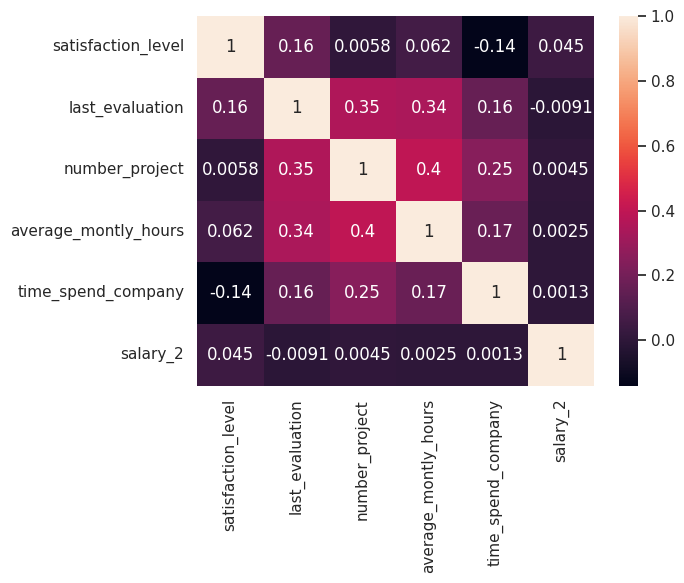

In [ ]:
# и визуализируем корреляционную матрицу
import seaborn as sns
sns.heatmap(HR.loc[:, ['satisfaction_level', 'last_evaluation', 
                       'number_project', 'average_montly_hours', 
                       'time_spend_company', 'salary_2']].corr(method='spearman'), annot=True)

В ходе проведенного корелляционного анализа мы установили:
1. Отсутвие сильной корреляции между любыми переменными в нашем наборе данных
2. Наиболее скореллированными показателями являются: Время проведенное сотрудником на своем рабочем месте и количество выполненных проектов этим сотрудником, коэффициент корреляции составляет 0.4. Несмотря на то что это лидирующее значение среди коэффициентов корреляции все равно его значение указавет на слабую (граница между средней и слабой корреляцией) взаимосвязь между двумя переменными.
3. Наименее скоррелируемые показатели это Уровень удовлетворенности сотрудника работой и количество выполненных проектов 0.0058. 
4. Также не потдвердилось предположение исполнителя, о наличии корреляция между уровнем заработной платы и осталными имеющимися показателями (в том числе количестве отработанных часов, и удовлетворенностью работой)

#Пунк 4

Рассчитаем сколько сотрудников работает в каждом
департаменте

In [ ]:
from tabulate import tabulate
HR_population = HR['department'].value_counts().reset_index() # подсчитаем сотрудников с помощью метода value_counts
HR_population.rename(columns = {'index':'department', 'department':'number of employees'}, inplace = True) # укажем название столбцов правильно
HR_population['% of the total population'] = (HR_population['number of employees']/HR_population['number of employees'].sum()*100).round(2)
# для большей информативности добавим процент от  общей численности
print(tabulate(HR_population, headers='keys', tablefmt='psql')) # оформим таблицу с помощью инструмента tabulate

+----+--------------+-----------------------+-----------------------------+
|    | department   |   number of employees |   % of the total population |
|----+--------------+-----------------------+-----------------------------|
|  0 | sales        |                  4140 |                       27.6  |
|  1 | technical    |                  2720 |                       18.13 |
|  2 | support      |                  2229 |                       14.86 |
|  3 | IT           |                  1227 |                        8.18 |
|  4 | product_mng  |                   902 |                        6.01 |
|  5 | marketing    |                   858 |                        5.72 |
|  6 | RandD        |                   787 |                        5.25 |
|  7 | accounting   |                   767 |                        5.11 |
|  8 | hr           |                   739 |                        4.93 |
|  9 | management   |                   630 |                        4.2  |
+----+------

<Axes: xlabel='number of employees', ylabel='department'>

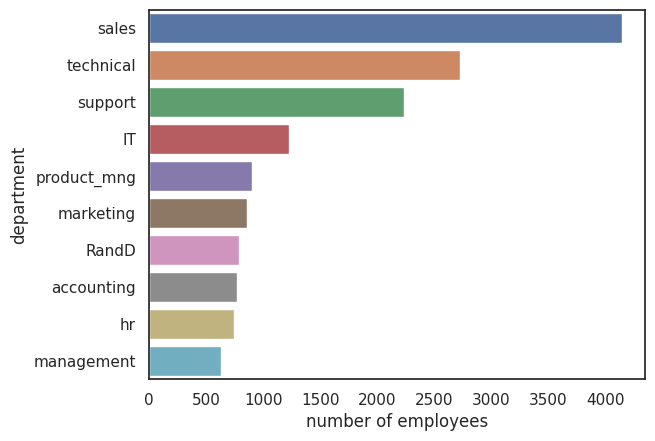

In [ ]:
import matplotlib.pyplot as plt # для последующих визуализаций добавим библиотеку
# Визуализируем распределение по сотрудникамм с помошью горизонтальной столбиковой диаграммы
HR_population_diagramm = HR_population[['department', 'number of employees']] # берем данные необходимые для построения диаграммы
sns.barplot(x='number of employees', y='department', data=HR_population_diagramm) # строим диаграмму

Самыми многочисленными департаментами являются департаменрт продаж почти 28% сотрудников, и технический департамент 18%. 
Наименее населенный кадровый департамент 5%. На долю руководства приходиться чуть более 4% рабочих мест.

#Пункт 5

Рассмотрим распределение сотрудников по заработной плате

In [ ]:
HR_salary = HR['salary'].value_counts().reset_index() # подсчитаем сотрудников с помощью метода value_counts
HR_salary.rename(columns = {'index':'salary', 'salary':'number of employees'}, inplace = True) # отредактируем название таблиц
HR_salary['% of the total population'] = (HR_salary['number of employees']/HR_salary['number of employees'].sum()*100).round(2)
# расчитаем процент
print(tabulate(HR_salary, headers='keys', tablefmt='psql')) # оформим таблицу с помощью инструмента tabulate

+----+----------+-----------------------+-----------------------------+
|    | salary   |   number of employees |   % of the total population |
|----+----------+-----------------------+-----------------------------|
|  0 | low      |                  7316 |                       48.78 |
|  1 | medium   |                  6446 |                       42.98 |
|  2 | high     |                  1237 |                        8.25 |
+----+----------+-----------------------+-----------------------------+


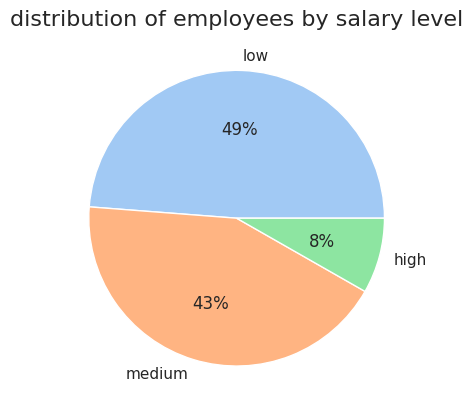

In [ ]:
# Визуализируем с помощью pie-диаграммы 
HR_salary_diagram = HR_salary[['salary', 'number of employees']] # берем данные необходимые для построения диаграммы
colors = sns.color_palette('pastel')[0:5] # возьмем нужную нам политру
plt.pie(HR_salary_diagram['number of employees'], labels = HR_salary_diagram['salary'], colors = colors, autopct='%.0f%%') # составим диаграмму
plt.title('distribution of employees by salary level', fontsize= 16 ) # подпишем данные
plt.show()

Примерно половина сотрудников получает низкую зарплату, высокую зарплату получают чуть более 8% сотрудников

#Пункт 6

Рассмотрим распределение сотрудников по зарплатам в каждом
департаменте по отдельности

In [ ]:
HR_s_d= HR[['department', 'salary']].assign(unit = 1) # добавим колонку для подсчета количества сотрудников
HR_s_d_t = HR_s_d.pivot_table(index = 'department', columns = 'salary', values = 'unit', aggfunc = 'count', margins = True).reset_index() # создадим отдельные колонки для каждого уровня 
HR_s_d_t['% of high'] = (HR_s_d_t['high']/HR_s_d_t['All']*100).round(2) # также для информативности добавим процентные соотношения
HR_s_d_t['% of low'] = (HR_s_d_t['low']/HR_s_d_t['All']*100).round(2)
HR_s_d_t['% of medium'] = (HR_s_d_t['medium']/HR_s_d_t['All']*100).round(2)
print(tabulate(HR_s_d_t, headers='keys', tablefmt='psql')) # оформим таблицу с помощью инструмента tabulate

+----+--------------+--------+-------+----------+-------+-------------+------------+---------------+
|    | department   |   high |   low |   medium |   All |   % of high |   % of low |   % of medium |
|----+--------------+--------+-------+----------+-------+-------------+------------+---------------|
|  0 | IT           |     83 |   609 |      535 |  1227 |        6.76 |      49.63 |         43.6  |
|  1 | RandD        |     51 |   364 |      372 |   787 |        6.48 |      46.25 |         47.27 |
|  2 | accounting   |     74 |   358 |      335 |   767 |        9.65 |      46.68 |         43.68 |
|  3 | hr           |     45 |   335 |      359 |   739 |        6.09 |      45.33 |         48.58 |
|  4 | management   |    225 |   180 |      225 |   630 |       35.71 |      28.57 |         35.71 |
|  5 | marketing    |     80 |   402 |      376 |   858 |        9.32 |      46.85 |         43.82 |
|  6 | product_mng  |     68 |   451 |      383 |   902 |        7.54 |      50    |       

Text(0, 0.5, 'number of employees')

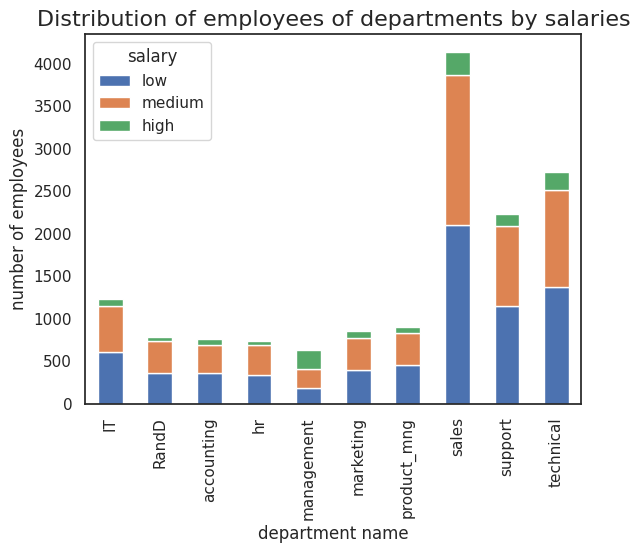

In [ ]:
# Визуализируем распределение уровня зарплат в каждом департаменте с помощью столбиковой диаграммы
HR_s_d_diagram = HR_s_d_t[['department', 'low', 'medium', 'high']] # возьмем необходимые данные для создания столбиковой диаграммы
HR_s_d_diagram = HR_s_d_diagram[:-1] # небольшая корректировка по удалению итогов
sns.set (style='white') # определим параметры диаграммы 
HR_s_d_diagram.set_index('department').plot(kind='bar', stacked= True)
plt.title('Distribution of employees of departments by salaries', fontsize= 16 ) # подпишем диаграмму
plt.xlabel('department name')
plt.ylabel('number of employees')

Департаменты имеющие наилучшие показатели по категории "много высокооплачиваемых/мало низкооплачиваемых": 

- менеджмент 35.71% / 35.71%
- технический департамент 7.39% / 42.17%
- продукт менеджеры 7.54% / 42.46%

Департаменты имеющие наихудшие показатели по категории "много низкооплачиваемых/мало высокооплачиваемых":

- RandD 47.27% / 6.48%
- hr 48.58% / 6.09%

#Пункт 7

Проверим гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом

Выдвенем нулевую гиппотезу H0 которая гласит - время проведенное сотруником на рабочем месте никак не связано с уровнем его заработной платы

Выдвенем альтернативную гиппотезу H1 которая гласит - сотрудник с высокой заработной платой проводит на рабочем месте в среднем больше времени чем сотрудник с низким окладом

Определим уровень значимости (альфа) равным в 0,05. Иными словами мы готовы будем допустить ошибку с вероятностью не более чем 5%

<Axes: ylabel='Frequency'>

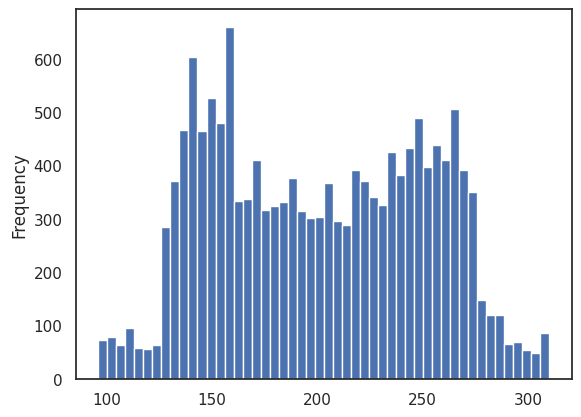

In [ ]:
# Для определения типа проверки гипотез нам необходимо проверить является распрпедение в нашей генеральной совокупности нормальным, для этого мы построим гистограмму значений количественной переменной 'average_monthly_hours'
HR['average_montly_hours'].plot(kind = 'hist', bins = 50)

Визуально распределение не кажется нормальным, оно имеет два пика первый в районе 150 (слева от среднеарифметического и медианного значения которые распологаются в районе 200) а второй пик расположен в районе 250 (справа от среднеарифметическое и медианны)

In [ ]:
# для того чтобы убедится что распределение не является нормальным проведем дополнительно Тест на нормальность Шапиро Уилкока
# и проверим нашу гипотезу о ненормальности распределения
from scipy.stats import shapiro
alpha=0.05 # определим уровень значимости
stat, pvalue = shapiro(HR['average_montly_hours'])
print('p-value', pvalue)
if pvalue > alpha:
    print('H0 = данные получены из нормального распределения')
else:
    print('H1 = данные получены не из нормального распределения')

p-value 0.0
H1 = данные получены не из нормального распределения


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Результаты теста указывают на то, что данные получены не из нормального распределения. Но есть сообщение о том, что в связи большим количеством данных тест может давать неточный результат. Необходимо получить дополнительное потверждение

In [ ]:
# выполним Тест на нормальность Колмогорова - Смирнова и еще раз проверим нашу гипозу о ненормальности распределения
from scipy.stats import kstest
stat, pvalue = kstest(HR['average_montly_hours'], 'norm')
print('p-value', pvalue)
if pvalue > alpha:
    print('H0 = данные получены из нормального распределения')
else:
    print('H1 = данные получены не из нормального распределения')

p-value 0.0
H1 = данные получены не из нормального распределения


Теперь мы можем относительно уверено предположить что распределение значений в переменной 'average_montly_hours' не является нормальным, в связи с чем целесообразно для проверки гипотезы использовать непараметрический критерий, остановим выбор на U- критерии Манна-Уитни

In [ ]:
import scipy.stats as stats
HR_contrast = HR[['salary', 'average_montly_hours']] # возьмем требуемые для проверки гипотезу данные
HR_low = HR_contrast.loc[HR_contrast['salary']=='low', ['average_montly_hours']] # создадим переменную со списком низкооплачиваемых сотрудников
HR_high = HR_contrast.loc[HR_contrast['salary']=='high', ['average_montly_hours']] # создадим переменную со списком высокооплачиваемых сотрудников
alpha = 0.05 # определим уровень значимости
stat, p = stats.mannwhitneyu(HR_low, HR_high) # проведем расчет
print('p-value', *p)
if p > alpha:
    print('H0 : (нулевая гипотеза) Уровень заработной платы не скореллирован со временем пребывания на работе')
else:
    print('H1 : (альтернативная гипотеза) Уровень заработной платы зависит от времени проведенного на рабочем месте')

p-value 0.8241330720858693
H0 : (нулевая гипотеза) Уровень заработной платы не скореллирован со временем пребывания на работе


<Axes: xlabel='salary', ylabel='average_montly_hours'>

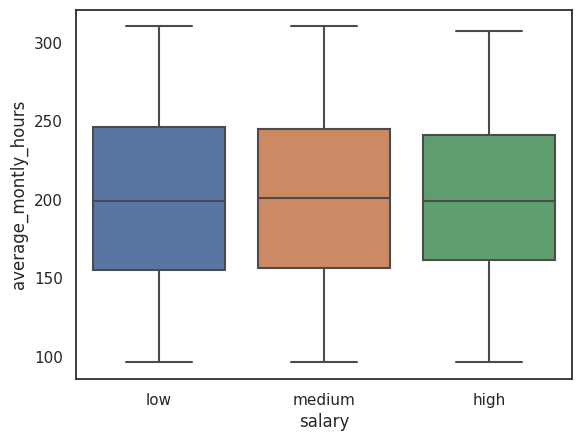

In [ ]:
# В качестве дополнительного подтверждения Н0 визуализируем данные в виде боксплотов 
sns.boxplot(x= 'salary', y= 'average_montly_hours', data= HR_contrast)

В ходе проверки гипотезы мы установили что у нас нет оснований отвергать нулевую гипотезу, мы не можем утверждать, что более высокооплачиваемые специалисты проводят на работе больше времени чем низкооплачиваемые.

Пункт 8

Рассчитаем следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):

-Доля сотрудников с повышением за последние 5 лет

-Средняя степень удовлетворенности

-Среднее количество проектов

In [ ]:
# сотставим таблицу для сопоставления показателей, уволеных и работуещих сотрудников укажем в разных строках
HR_mean = HR[['left', 'promotion_last_5years', 'satisfaction_level', 'number_project']] # возьмем требуемые данные 
HR_mean.loc[HR['left'] == 0,'left'] = 'not fired'
HR_mean.loc[HR['left'] == 1,'left'] = 'fired' 
HR_mean_table = HR_mean.groupby('left').mean().round(3).reset_index() # подсчитаем среднеарифметические значения
HR_mean_table = HR_mean_table.rename(columns={'promotion_last_5years': 'share of promoted employees', # поменяем наименование колонок на более соответсвующее
                                              'satisfaction_level': 'mean satisfaction level', 
                                              'number_project' : 'average number of completed projects'})
print(tabulate(HR_mean_table, headers='keys', tablefmt='psql')) # оформим таблицу с помощью инструмента tabulate

+----+-----------+-------------------------------+---------------------------+----------------------------------------+
|    | left      |   share of promoted employees |   mean satisfaction level |   average number of completed projects |
|----+-----------+-------------------------------+---------------------------+----------------------------------------|
|  0 | fired     |                         0.005 |                     0.44  |                                  3.856 |
|  1 | not fired |                         0.026 |                     0.667 |                                  3.787 |
+----+-----------+-------------------------------+---------------------------+----------------------------------------+


По результатам сопоставления значения переменной "Повышение за последние пять лет" мы видим, что результаты у двух групп сушественно отличаются. Среди не уволившихся сотрудников повышения были удостоины менее 3%, в то время как из группы впоследствии уволившихся сотрудников повышения дождались менее 1% сотрудников. 

<Axes: xlabel='left', ylabel='satisfaction_level'>

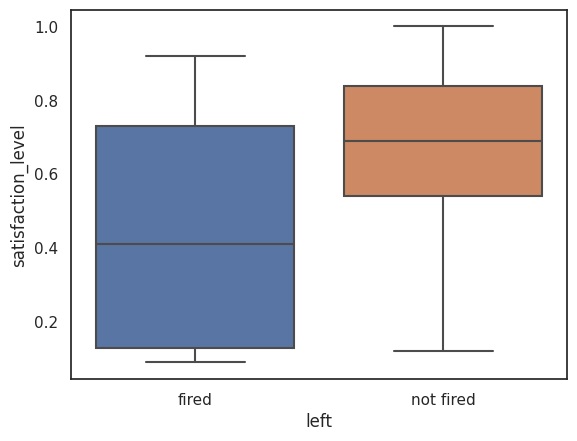

In [ ]:
# для наглядности построим боксплот для переменной "уровень удовлетворенности"
sns.boxplot(x= 'left', y= 'satisfaction_level', data= HR_mean)

По результатам сопоставления переменной "Уровень удовлетворенности" мы видим что средний уровень удовлетворенности у уволившихся сотрудников на 33% был ниже чем у оставшихся работников, по средствам визуализации данных мы также можем сказать что у большинства уволившихся сотрудников уровень удовлетворенности был значительно ниже чем у оставвшихся.   

<Axes: xlabel='left', ylabel='number_project'>

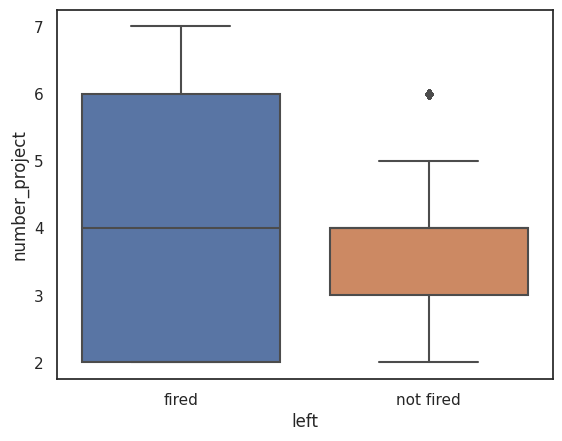

In [ ]:
# для наглядности построим боксплот для переменной "количство выполненных проектов"
sns.boxplot(x= 'left', y= 'number_project', data= HR_mean)

По результатам сопоставления средних значений показателя "Количество выполненых проектов" в таблице мы видим практически одинакое значение у двух групп, чуть менее четырех проектов на человека. Но по результатам визуалиции мы можем заметить что среди уволившихся есть большой разброс в количестве выполненных проектов, в том числе видно что среди уволившихся сотрудников около половины были более продуктивнее чем их оставшиеся коллеги. 

#Пункт 9

- Разделим данные на тестовую и обучающую выборки

- Построим модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)

- Оценим качество модели на тестовой выборки

In [ ]:
from sklearn.model_selection import train_test_split # добавим функцию которая поделит все на опытную и тестовую группу
X = HR[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']] # определимся с Х-значениями
y = HR['left'] # определимся с у-значниями
y = y.to_numpy() 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) # и поделим наши данные на обучающие и на тестовые

In [ ]:
# Загружаем функцию LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis() # определяем переменную для функции
lda.fit(X_train, y_train) # указываем данные для опыта

LinearDiscriminantAnalysis()

In [ ]:
lda.predict(X_test) # предсказваем у-значения в тестовой группе

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T # сравним тестовые у-значения и спрогнозированные у-значения
result.head(10) # видно что есть ошибки но большинство значений правильны

,0,1
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
5,0,0
6,0,0
7,0,1
8,0,0
9,0,1


In [ ]:
from sklearn.metrics import accuracy_score
print('Прогноз верен в ', accuracy_score(y_test, lda.predict(X_test))*100, '% случаев') 

Прогноз верен в  75.36 % случаев


Прогнозные значения оказались верны в 75.36% случаев, в целях оптимизации исполнитель попытался исключить малозначимую на его взгляд переменную, "время прошедшее с даты последней оценки", но результаты ухудшились до 75.23%. Исходная модель более оптимальна.